In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

font = {'size': 14}

matplotlib.rc('font', **font)


In [16]:
os.listdir('./maml_ens/')

['mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=1_pred_mode=mean.csvhwr',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=1_pred_mode=logprobs.csvpqf',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=3_pred_mode=logprobs.csvxrt',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=1_pred_mode=mean.csvzuk',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=6_pred_mode=logprobs.csvdel',
 'mgpu_miniImageNet_order=0_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=1_pred_mode=mean.csvcbr',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=12_pred_mode=logprobs.csvwsr',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=6_pred_mode=mean.csvkum',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=3_pred_mode=mean.cs

In [17]:
def parse_name(filename):
    params = filename.split('_')
    n = params[3][2:]
    k = params[4][2:]
    n_models = params[-3][7:]
    predmode = params[-1][:-6]
    params = {'n': int(n), 'k' : int(k), 'n_models': int(n_models), 'pred_mode': predmode}
    return params

In [18]:
def draw_one(filename):
    fig = plt.figure(figsize=(24, 10))

    ax1, ax2 = fig.subplots(nrows=1, ncols=2)
    
    params = parse_name(filename)
    n_shot, k_way, n_models = params['n'], params['k'], params['n_models'] 
    
    data = pd.read_csv(os.path.join('maml_ens', filename))
    epochs = data['epoch']
    train_loss = data['loss']
    train_acc = data['categorical_accuracy']
    
    val_acc_str = f'val_{n_shot}-shot_{k_way}-way_acc'
    
    test_loss = data['val_loss']
    test_acc = data[val_acc_str]
    
    
    ax1.plot(epochs, train_loss, color='blue', label='train loss')
    ax1.plot(epochs, test_loss, color='red', label='test loss')
    
    for i in range(n_models):
        val_loss = data[f'val_loss_{i}']
        ax1.plot(epochs, val_loss, '--', alpha=0.4)
    
    ax1.legend()
    ax1.grid(ls=':')
    ax1.set_title('loss')
    
    
    ax2.plot(epochs, train_acc, color='blue', label='train acc')
    ax2.plot(epochs, test_acc, color='red', label='test acc')
    
    for i in range(n_models):
        val_acc = data[val_acc_str + f'_{i}']
        ax2.plot(epochs, val_acc, '--', alpha=0.4)
    
    ax2.legend()
    ax2.grid(ls=':')
    ax2.set_title('accuracy')
    
    fig.suptitle(filename)

In [19]:
names = os.listdir('maml_ens/')

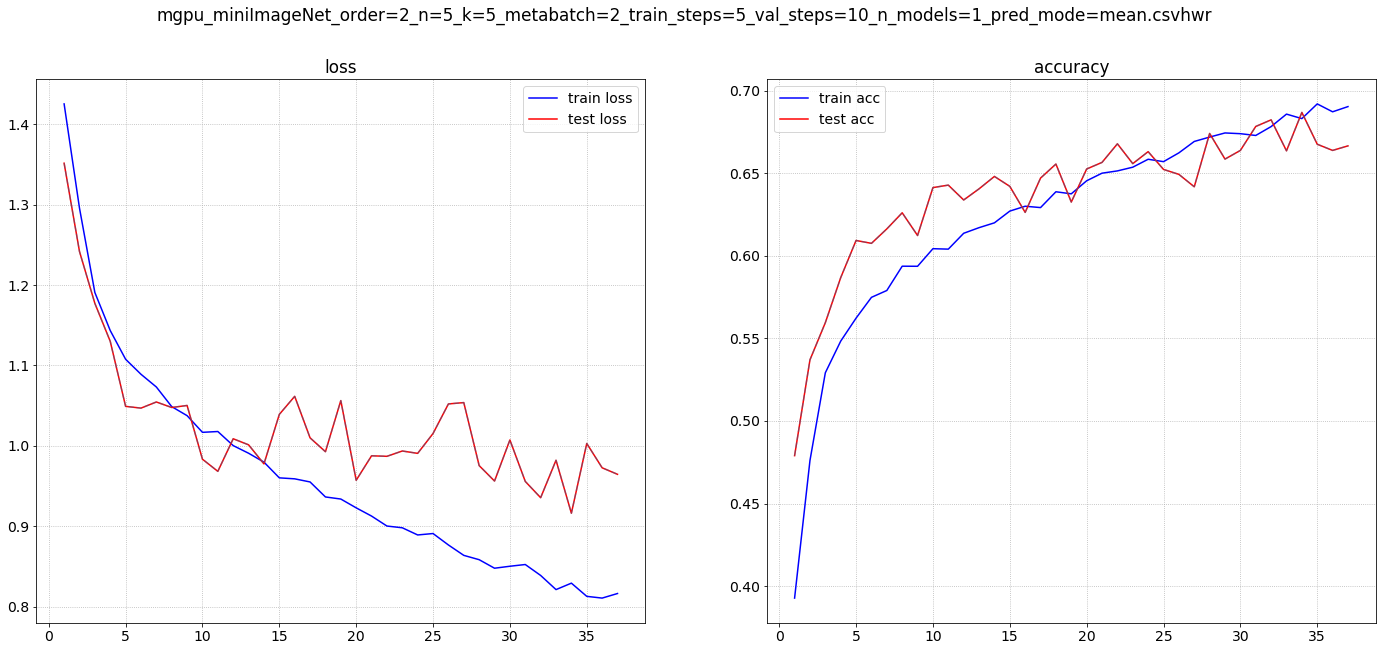

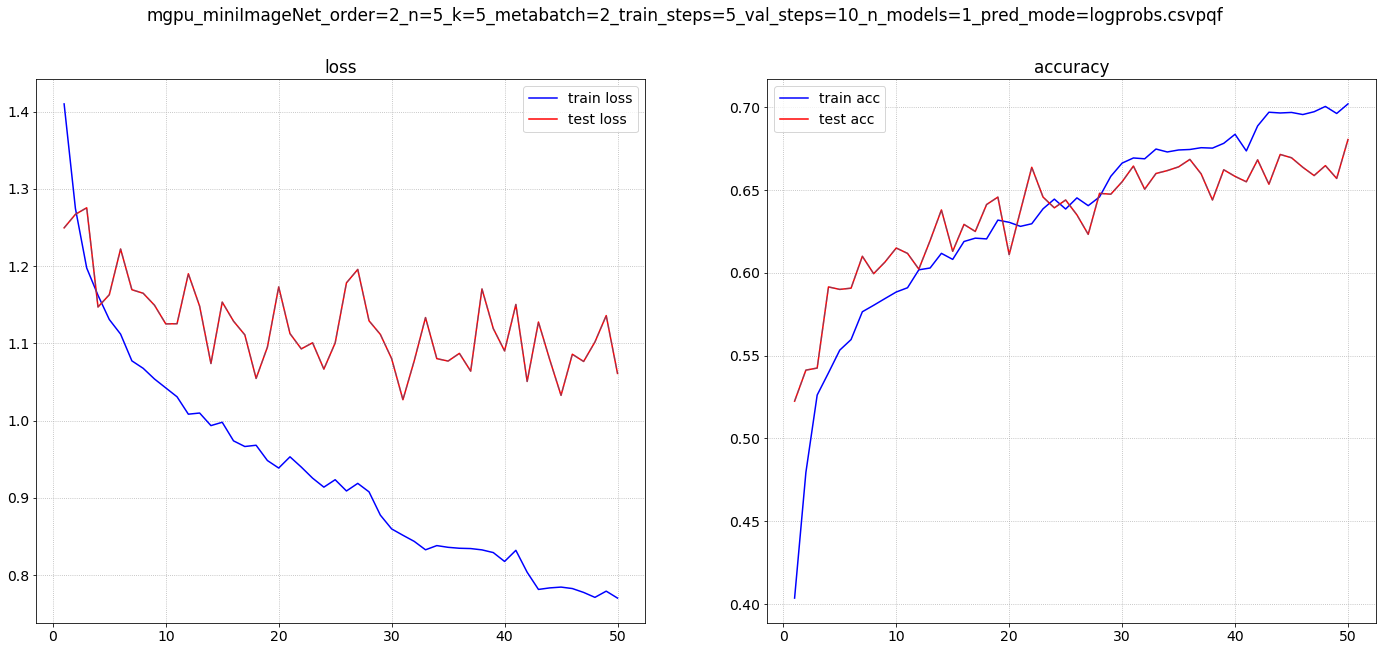

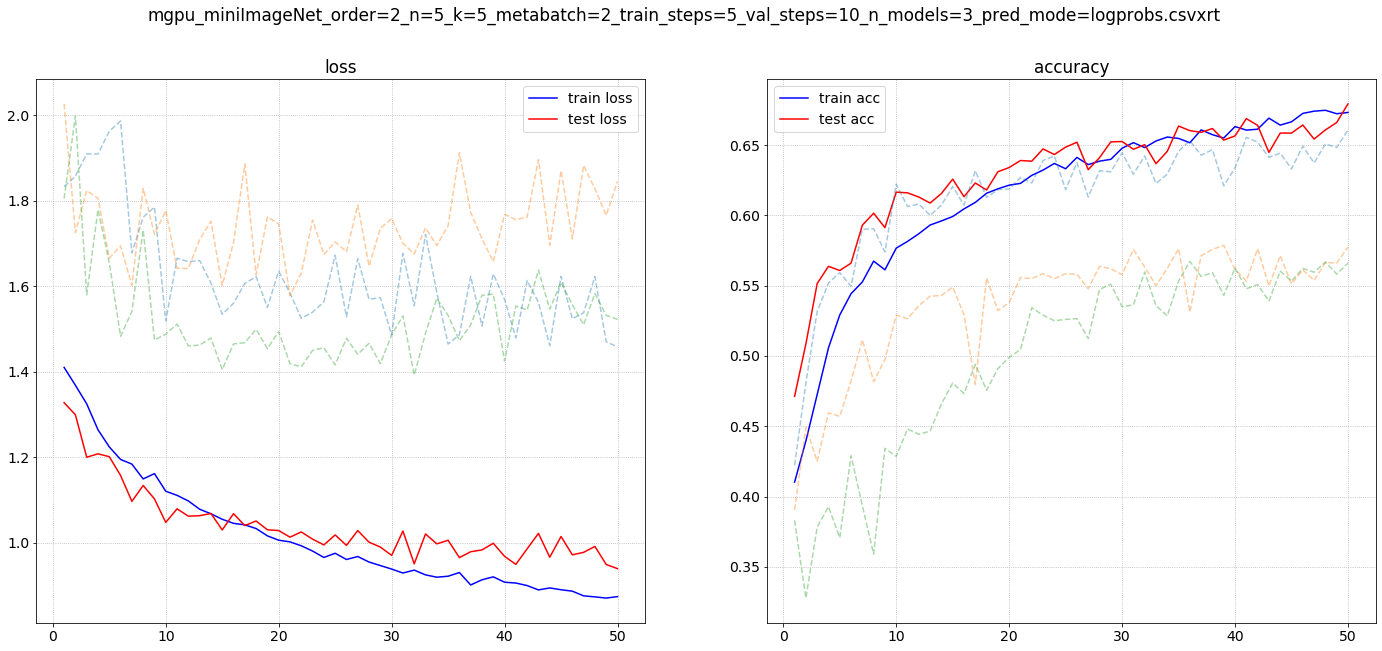

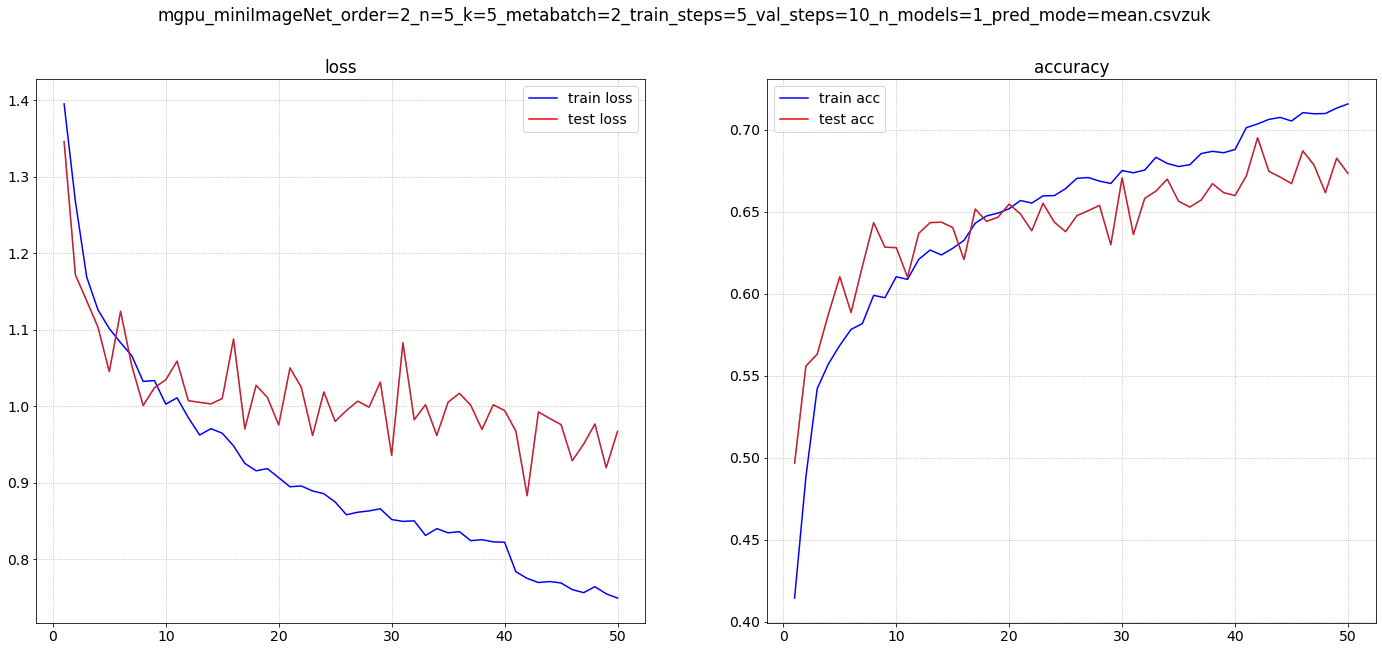

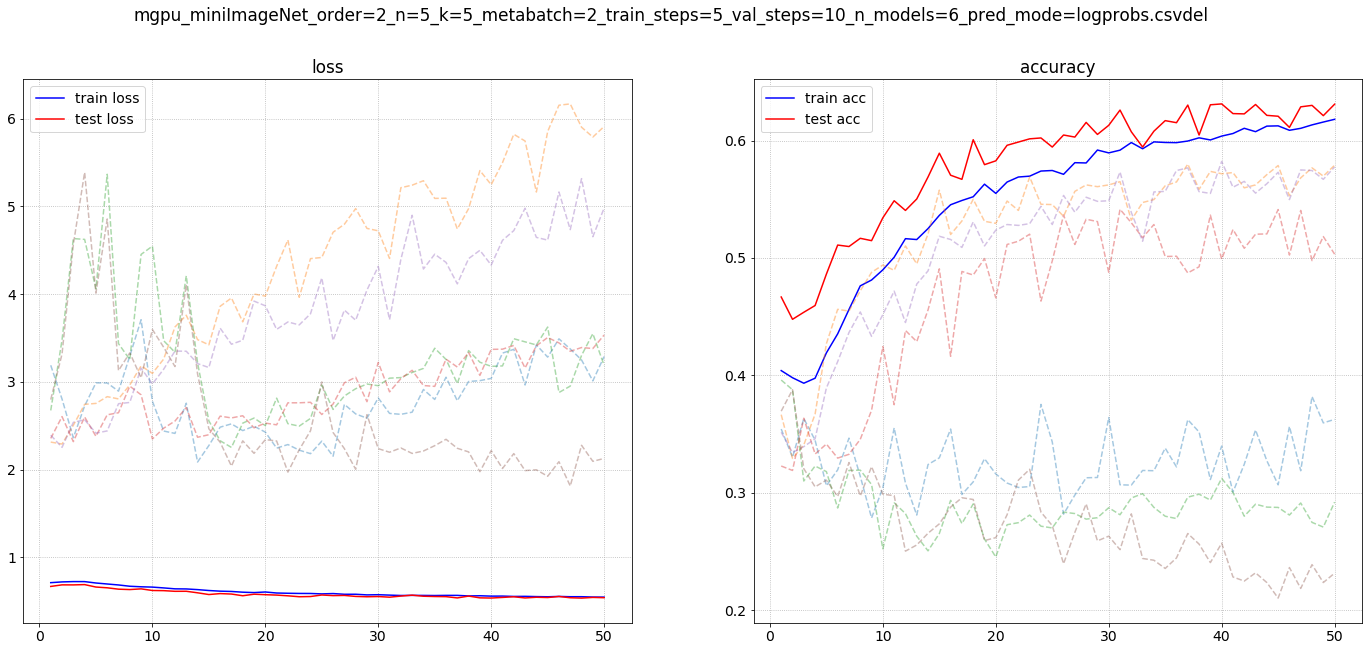

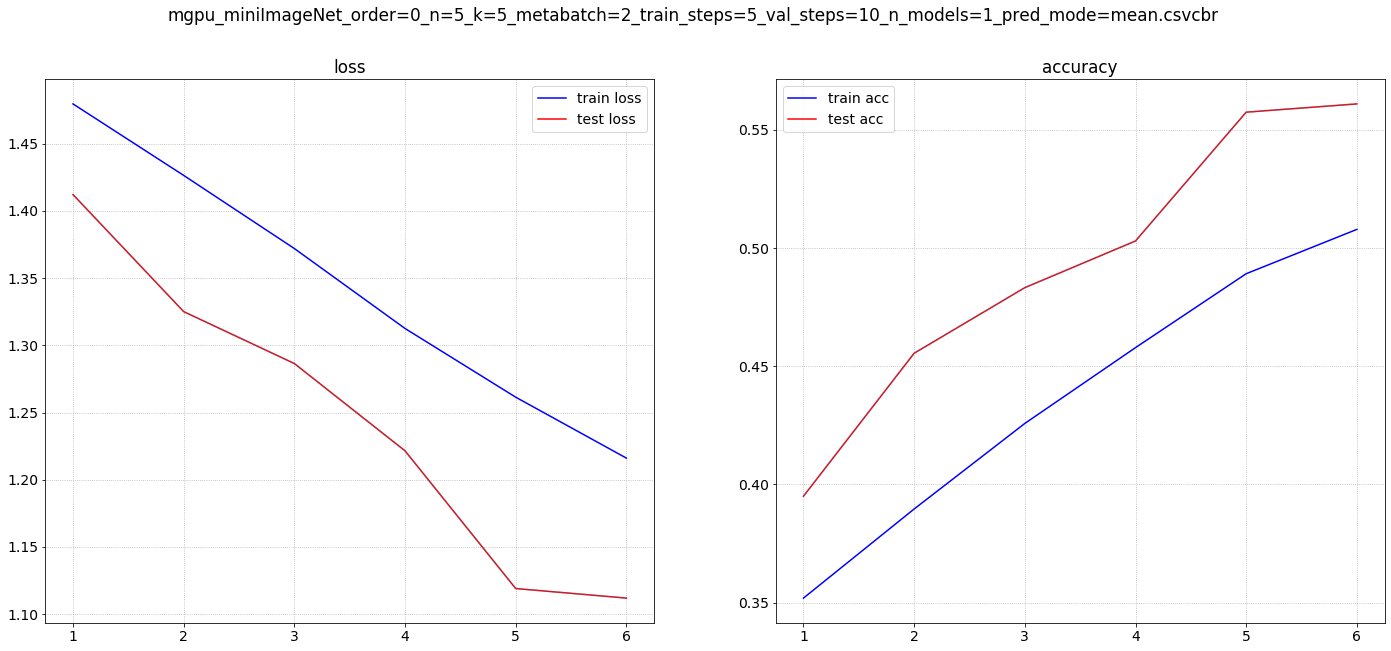

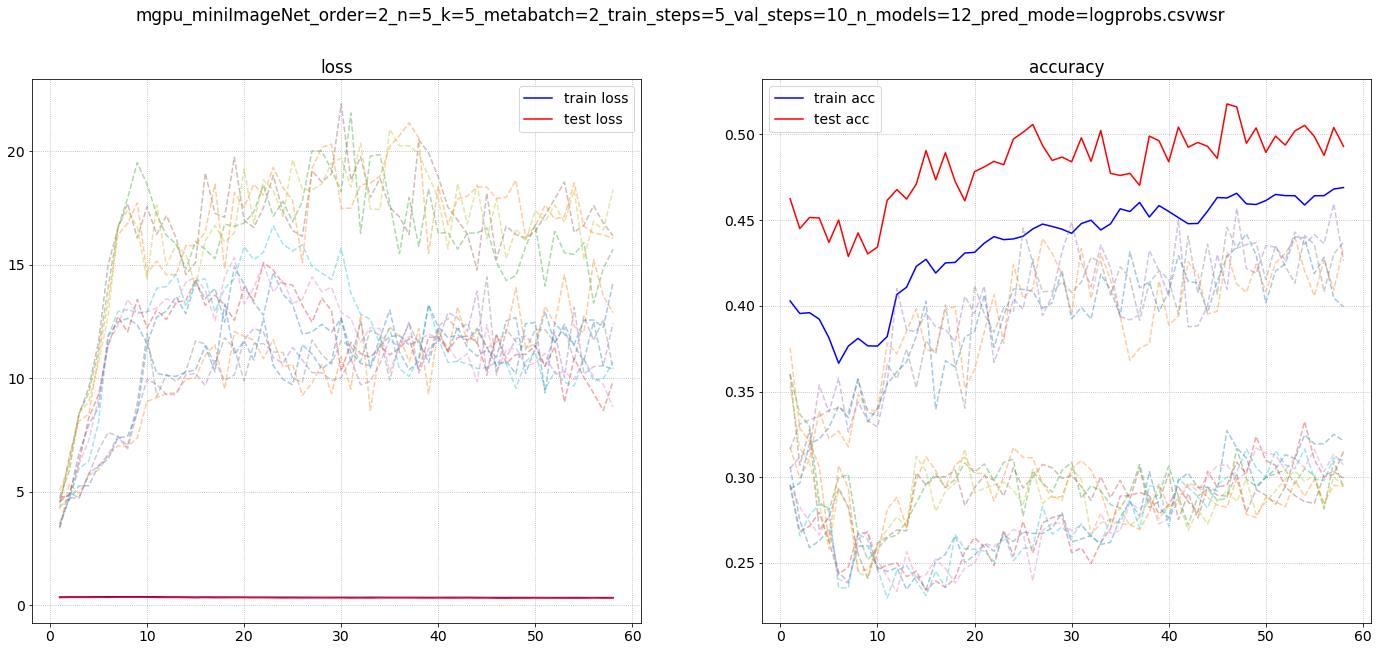

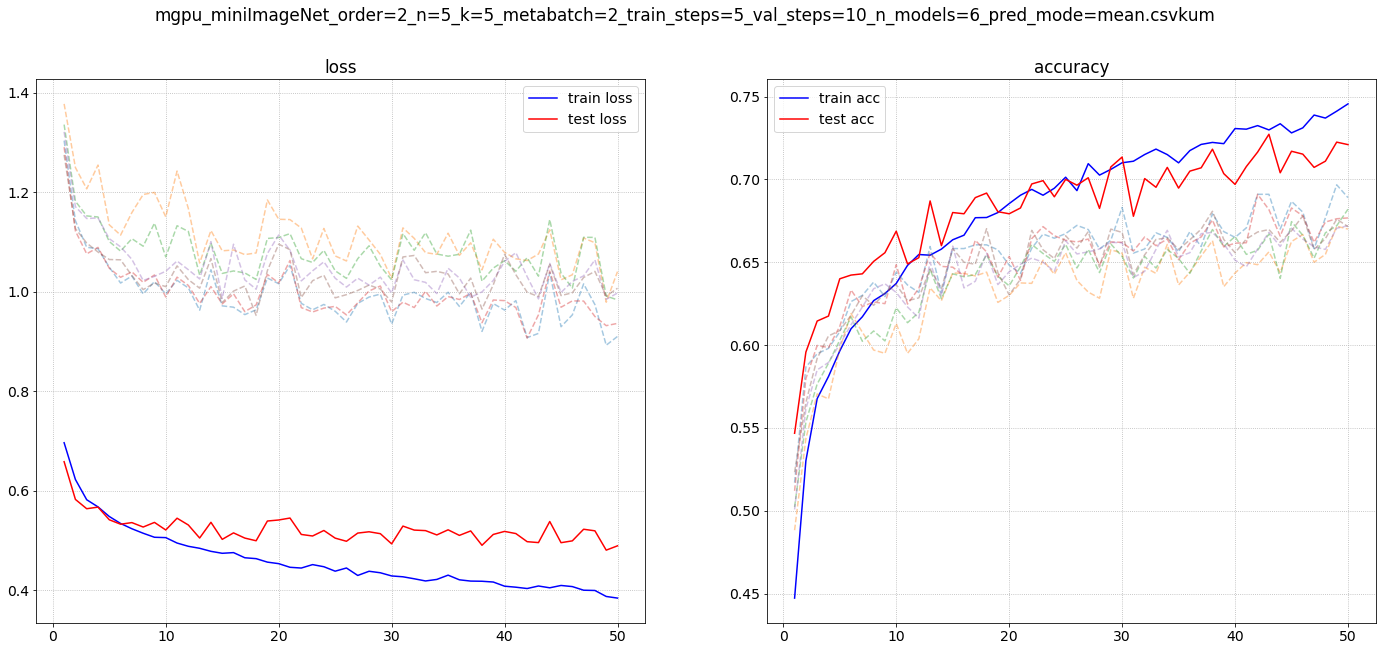

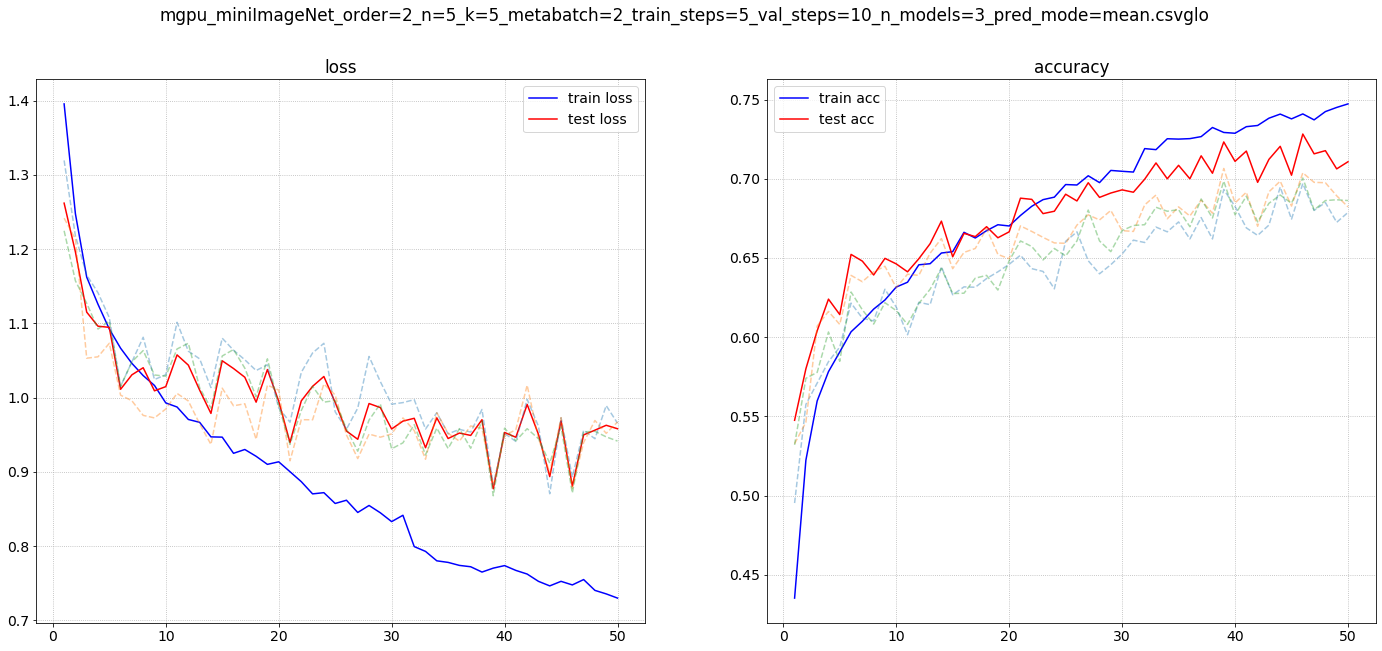

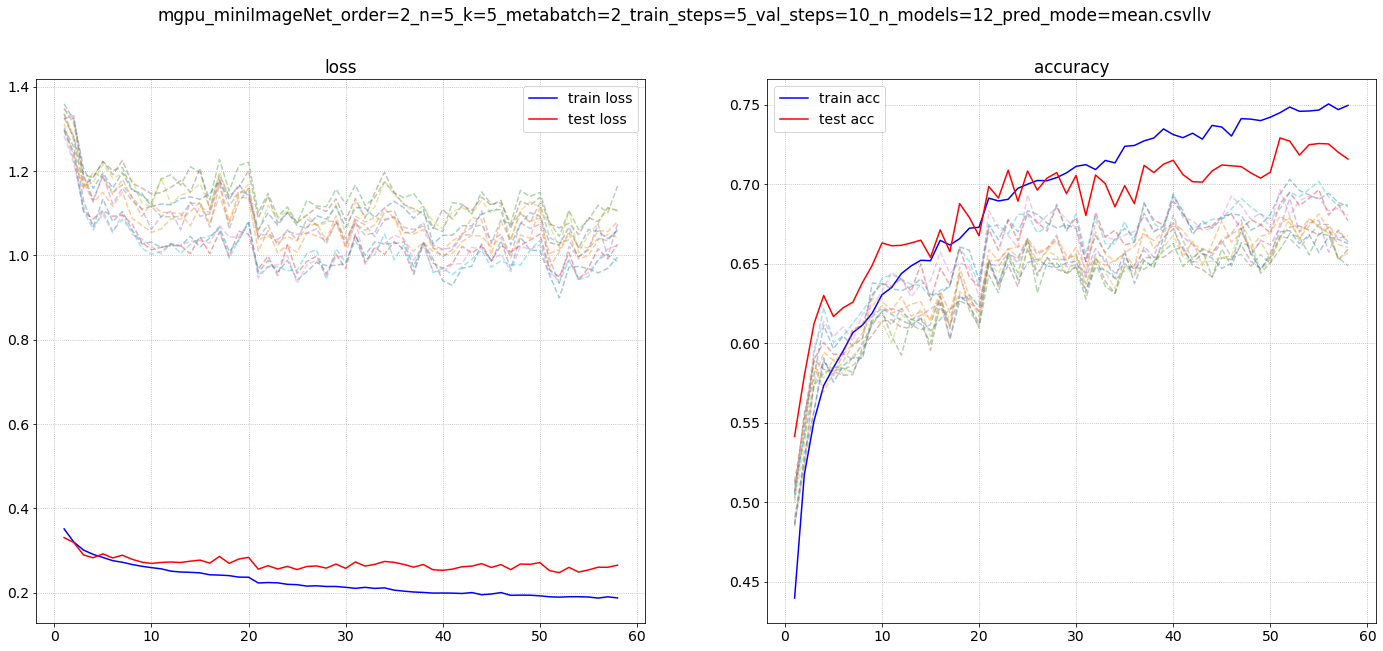

In [20]:
for name in names:
    draw_one(name)

In [25]:
def draw_many(names):
    fig = plt.figure(figsize=(24, 10))

    ax1, ax2 = fig.subplots(nrows=1, ncols=2)
    
    for filename in names:
        params = parse_name(filename)
        n_shot, k_way, n_models, mode = params['n'], params['k'], params['n_models'], params['pred_mode']
    
        data = pd.read_csv(os.path.join('maml_ens', filename))
        epochs = data['epoch']
        
        val_acc_str = f'val_{n_shot}-shot_{k_way}-way_acc'

        test_loss = data['val_loss']
        test_acc = data[val_acc_str]
    
        #ax1.plot(epochs, train_loss, color='blue', label='')
        ax1.plot(epochs, test_loss, label=f'{n_models} models {mode}')

        #ax2.plot(epochs, train_acc, color='blue', label='train acc')
        ax2.plot(epochs, test_acc, label=f'{n_models} models {mode}')
        
    ax1.legend()
    ax1.grid(ls=':')
    ax1.set_title('loss')

    ax2.legend()
    ax2.grid(ls=':')
    ax2.set_title('accuracy')



In [26]:
names = names[0:3]

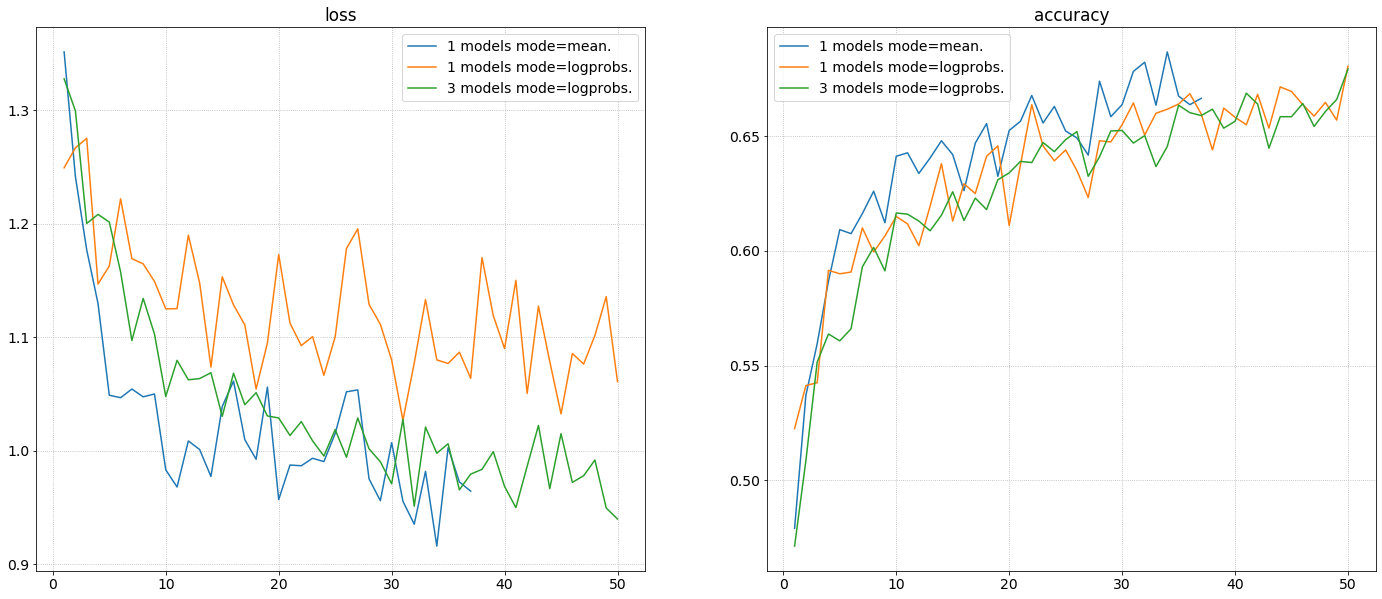

In [27]:
draw_many(names)